<a href="https://colab.research.google.com/github/vvbandeira/gsoc-tutorial-example/blob/main/openlane_gsoc_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenLane flow with conda-eda packages

```
Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0
```

## How to use this notebook

1. Click ▷ for the [first code cell](#scrollTo=NC__X6Jph4CU).
1. Wait for the runtime to restart (should display a *Your session crashed for an unknown reason* toast message, [read why?](https://github.com/conda-incubator/condacolab#usage)).
1. Click `Runtime > Run after` if you're in an hurry or simply run the remaining cells one by one.

## Install conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh")
!sed -i -e /cudatoolkit/d /usr/local/conda-meta/pinned

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


## Install dependencies

In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - magic
  - openroad
  - netgen
  - yosys
  - gdstk
  - tcllib
  - python
  - pip
  - pip:
    - pyyaml
    - click
    - pandas
    - volare

Writing environment.yml


In [ ]:
!conda env update --prefix /usr/local --file environment.yml

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

## Get OpenLane

In [ ]:
# use fixed version of OpenLane due to out-of-date OpenROAD on conda.
!git clone --depth=1 --branch 2022.06.02_01.56.32 https://github.com/The-OpenROAD-Project/OpenLane /content/OpenLane
import os
os.chdir('/content/OpenLane')
!pwd
!ls

Cloning into '/content/OpenLane'...
remote: Enumerating objects: 518, done.
remote: Counting objects: 100% (518/518), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 518 (delta 106), reused 266 (delta 43), pack-reused 0
Receiving objects: 100% (518/518), 2.78 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Note: checking out '01e951092150ee8619286b0807ee263198b5ea6d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

/content/OpenLane
AUTHORS.md	 docker       Makefile		     run_designs.py
configuration	 docs	      README.md		     run_issue_regressions.py
conf.py		 env.py       regression_results     

## Setup OpenLane

In [ ]:
import os
PATH=os.environ['PATH']
%env PDK_ROOT=/usr/local/pdks
%env TCLLIBPATH=/usr/local/lib/tcllib1.20
%env OPENLANE_ROOT=/content/OpenLane
%env PATH={PATH}:/content/OpenLane:/content/OpenLane/scripts
%env OPENLANE_LOCAL_INSTALL=1
# disable version checks because we use conda packaged versions
%env TEST_MISMATCHES=none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
%env RUN_KLAYOUT=0
!sed -i 's/set ::env(RUN_KLAYOUT) 1/set ::env(RUN_KLAYOUT) 0/' ./configuration/general.tcl
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
%env RUN_CVC=0
!sed -i 's/set ::env(RUN_CVC) 1/set ::env(RUN_CVC) 0/' ./configuration/general.tcl
!volare enable_or_build -t NULL -j$(nproc) $(python3 ./dependencies/tool.py open_pdks -f commit)

env: PDK_ROOT=/usr/local/pdks
env: TCLLIBPATH=/usr/local/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
env: TEST_MISMATCHES=none
env: RUN_KLAYOUT=0
env: RUN_CVC=0
Unpacking…                                                                  10… 
⠋ Enabling version 41c0908b47130d5675ff8484255b43f66463a7d6…
PDK version 41c0908b47130d5675ff8484255b43f66463a7d6 enabled.


## Run OpenLane Flow

In [ ]:
!./flow.tcl -design spm

OpenLane 01e951092150ee8619286b0807ee263198b5ea6d
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/spm/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/spm/config.tcl
[INFO]: PDKs root directory: /usr/local/pdks
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/pdks/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/spm/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/spm/runs/RUN_2022.06.10_15.40.24
[INFO]: Preparing LEF files for the nom corner...
[INFO]: Preparing LEF files for the min corner...
[INFO]: Preparing LEF files for the max corner...
[STEP 1]
[INFO]: Running Synthesis...
[STEP 2]
[INFO]: Running Single-Corner

## Display layout

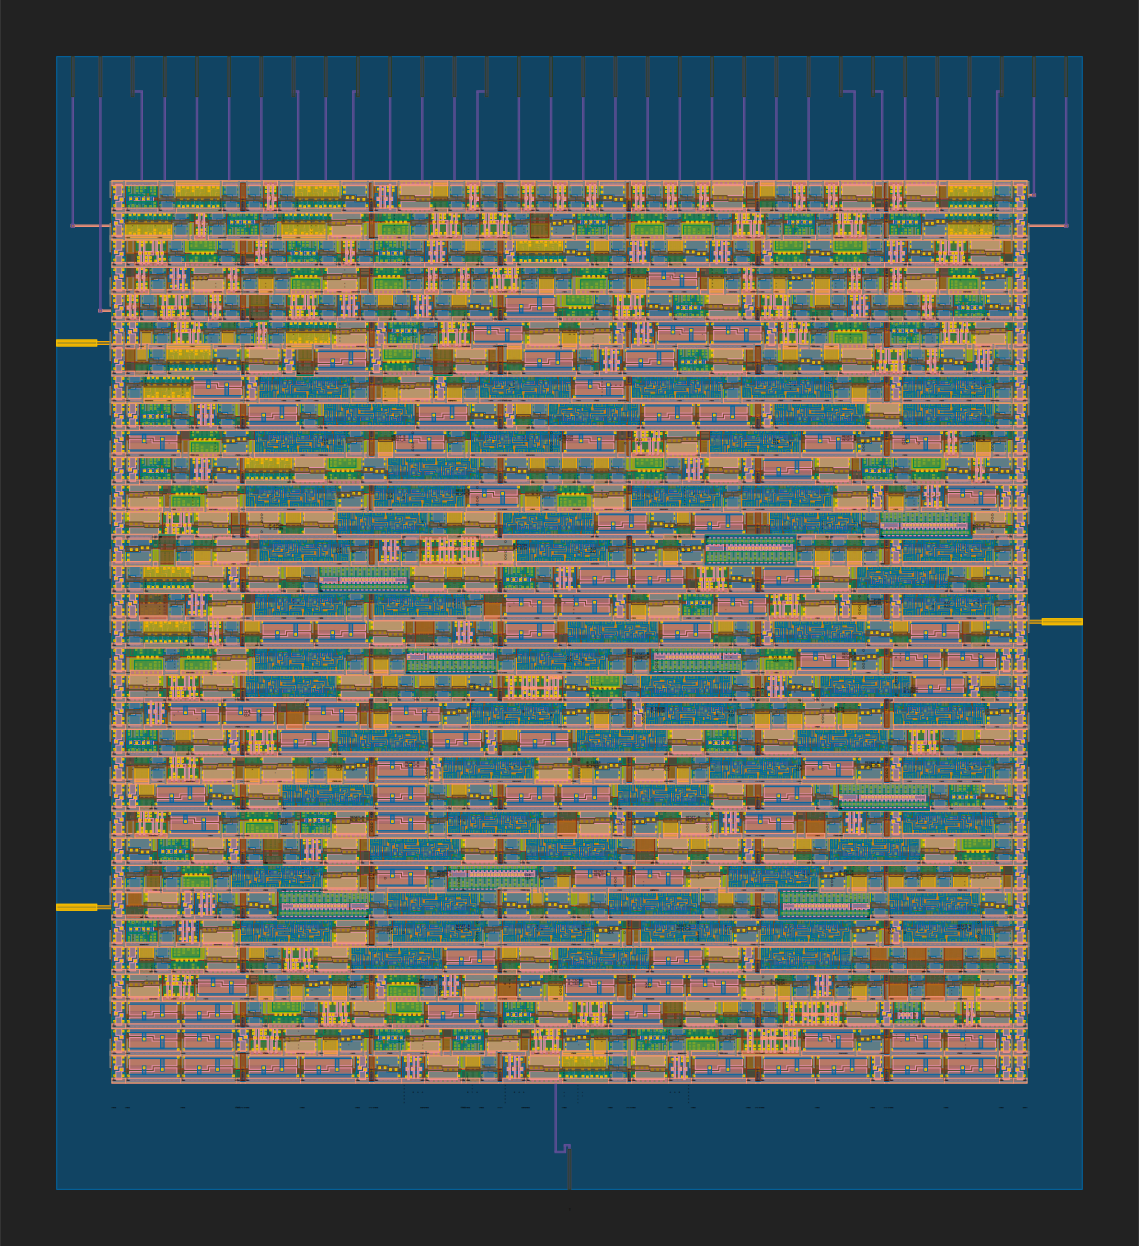

In [ ]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('/content/OpenLane/designs/spm/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

## Dump flow report

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('/content/OpenLane/designs/spm/runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content/OpenLane/designs/spm
design_name,spm
config,RUN_2022.06.10_15.40.24
flow_status,flow completed
total_runtime,0h1m50s0ms
routed_runtime,0h1m30s0ms
(Cell/mm^2)/Core_Util,-2.222222
DIEAREA_mm^2,0.011623
CellPer_mm^2,-1
OpenDP_Util,48.12
